# Task – 1: Activation Functions
Different activation functions are used in the NN. This part of the lab is to implement the different activation functions and their derivatives.

Write Python code to produce the following activation functions and their derivatives if any.

In [1]:
#Importing all required packages
import matplotlib.pyplot as plt
import numpy as np

Sigmoid activation function and its derivative.

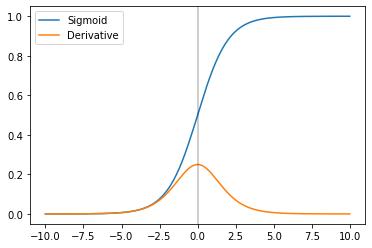

In [2]:
#write your codes and discuss here...
x = np.arange(-10.0,10.1,0.1)
y = []
dy = []
for i in x:
    y.append(1/(1+np.exp(-i)))
    dy.append(np.exp(-i)/(1+np.exp(-i))**2)
plt.plot(x,y,label='Sigmoid')
plt.plot(x,dy,label='Derivative')
plt.legend()
plt.axvline(color = 'black',alpha = 0.25)
plt.show()

Tanh activation function and its derivative.

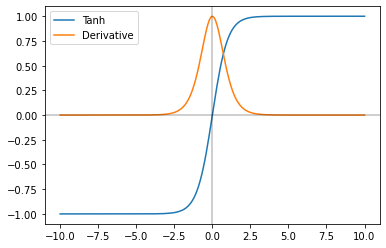

In [3]:
#write your codes and discuss here...
x = np.arange(-10.0,10.1,0.1)
y = []
dy = []
for i in x:
    y.append((np.exp(i)-np.exp(-i))/(np.exp(i)+np.exp(-i)))
    dy.append(1-((np.exp(i)-np.exp(-i))/(np.exp(i)+np.exp(-i)))**2)
plt.plot(x,y,label='Tanh')
plt.plot(x,dy,label='Derivative')
plt.legend()
plt.axvline(color = 'black',alpha = 0.25)
plt.axhline(color = 'black',alpha = 0.25)
plt.show()

ReLU activation function and its derivative.

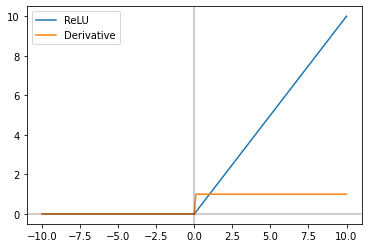

In [4]:
#write your codes and discuss here...
x = np.arange(-10.0,10.1,0.1)
y = []
dy = []
for i in x:
    y.append(max(i,0))
    dy.append(0 if i < 0 else 1 if i > 0 else '')
plt.plot(x,y,label='ReLU')
plt.plot(x,dy,label='Derivative')
plt.legend()
plt.axvline(color = 'black',alpha = 0.25)
plt.axhline(color = 'black',alpha = 0.25)
plt.show()

Define an array X= [-21,…,21] and pass it to the sigmoid function to calculate the corresponding values of the function (Y). Plot results of this operation as in the following?

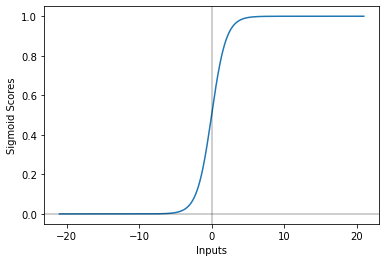

In [5]:
#write your codes and discuss here...
x = np.arange(-21.0,21.1,0.1)
y = []
dy = []
for i in x:
    y.append(1/(1+np.exp(-i)))
plt.plot(x,y)
plt.xlabel('Inputs')
plt.ylabel('Sigmoid Scores')
plt.axvline(color = 'black',alpha = 0.25)
plt.axhline(color = 'black',alpha = 0.25)
plt.show()

Repeat the former task for the SoftMax function. What is the difference between the results between SoftMax and sigmoid and why does this happen?

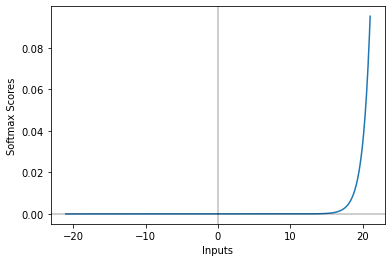

In [6]:
#write your codes and discuss here...
x = np.arange(-21.0,21.1,0.1)
y = []
dy = []
for i in x:
    y.append(np.exp(i)/sum(np.exp(x)))
plt.plot(x,y)
plt.xlabel('Inputs')
plt.ylabel('Softmax Scores')
plt.axvline(color = 'black',alpha = 0.25)
plt.axhline(color = 'black',alpha = 0.25)
plt.show()

# Task – 2: Implementing Perceptron using Pytorch
Different datasets can be generated using scikit-learn. 
1. Use sklearn.datasets and import make_blobs
2. Generate a dataset which consists of 100 patterns, 2 classes, standard deviation = 1 and 2 features. 
3. Plot this dataset with a different color for each class using matplotlib
4. Split the dataset into 70% for training and 30% for testing.
5. Normalize the dataset to zero mean and unit variance. A good method is described in https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
6. Plot the training and the testing datasets.
7. Define a perceptron class that includes different operations necessary for achieving the classification operations such as training, forward, backwards, and evaluation of the perceptron. (see picture below)
8. Train the perceptron using the class defined in 7.
9. Evaluate the model using the class in 7.
10. Draw the boundary line and plot the data.

In [7]:
#write your codes and discuss here...
import torch
import torchvision
from sklearn.datasets import make_blobs
dataset = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0,random_state = 4)

C:\Anaconda\envs\MLLAB\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


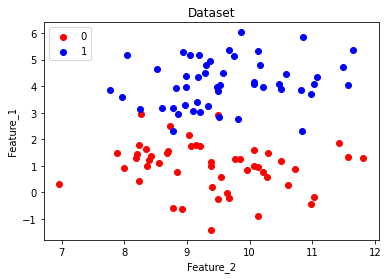

In [8]:
def plot_data(input_x,response_y,title):
    x = input_x.transpose()[0]
    y = input_x.transpose()[1]
    plt.scatter(x[response_y == 0],y[response_y==0],c='r', label = 0)
    plt.scatter(x[response_y == 1],y[response_y==1],c='b', label = 1)
    plt.xlabel('Feature_2')
    plt.ylabel('Feature_1')
    plt.title(title)
    plt.legend()
    plt.show()

plot_data(dataset[0],dataset[1],'Dataset')

In [9]:
x = torch.from_numpy(dataset[0])
y = torch.from_numpy(dataset[1])

x_train, x_test = x[:70], x[70:]
y_train, y_test = y[:70], y[70:]

In [10]:
mean, sd = x_train.mean(axis=0), x_train.std(axis=0)
x_train_norm = (x_train - mean) / sd
mean, sd = x_test.mean(axis=0), x_test.std(axis=0)
x_test_norm = (x_test - mean) / sd

Text(0.5, 1.0, 'Train Dataset')

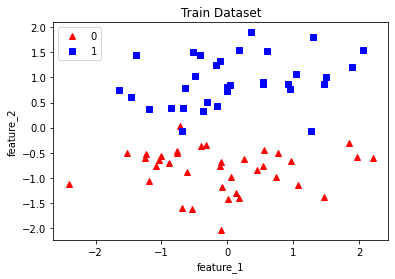

In [11]:
plt.plot(x_train_norm[:, 0][y_train == 0], x_train_norm[:, 1][y_train == 0], 'r^',label = 0)
plt.plot(x_train_norm[:, 0][y_train == 1], x_train_norm[:, 1][y_train == 1], 'bs',label = 1)
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.legend()
plt.title('Train Dataset')

Text(0.5, 1.0, 'Test Dataset')

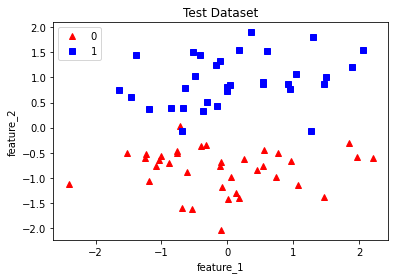

In [12]:
plt.plot(x_train_norm[:, 0][y_train == 0], x_train_norm[:, 1][y_train == 0], 'r^',label = 0)
plt.plot(x_train_norm[:, 0][y_train == 1], x_train_norm[:, 1][y_train == 1], 'bs',label = 1)
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.legend()
plt.title('Test Dataset')

In [13]:
class Perceptron():
    def __init__(self, num_features: int):
        self.num_features = 2
        self.weights = torch.zeros(num_features, 1, dtype=torch.float32)
        self.bias = torch.zeros(1, dtype=torch.float32)
    
    def forward(self, x):
        linear = torch.add(torch.mm(x, self.weights), self.bias)
        flag = linear > 0.
        predictions = (flag * 1.0) + (~(flag) * 0.0)
        return predictions
        
    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors
    
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.size()[0]):
                errors = self.backward(x[i].view(1, self.num_features), y[i]).view(-1)
                self.weights += (errors * x[i]).view(self.num_features, 1)
                self.bias = errors
                    
    def evaluate(self, x, y):
        predictions = self.forward(x).view(-1)
        accuracy = torch.sum(predictions == y).float() / y.size()[0]
        return accuracy

In [14]:
blob_perceptron = Perceptron(2)
x_train_tensor = x_train_norm.clone().detach().type(torch.FloatTensor).to('cpu')
y_train_tensor = y_train.clone().detach().type(torch.FloatTensor).to('cpu')

blob_perceptron.train(x_train_tensor,y_train_tensor, epochs=10)

print('Model parameters:')
print('Weights: %s' % blob_perceptron.weights)
print('Bias: %s' % blob_perceptron.bias)

Model parameters:
Weights: tensor([[0.4466],
        [2.6449]])
Bias: tensor([0.])


In [15]:
x_test_tensor = x_test_norm.clone().detach().type(torch.FloatTensor).to('cpu')
y_test_tensor = y_test.clone().detach().type(torch.FloatTensor).to('cpu')

test_acc = blob_perceptron.evaluate(x_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


C:\Anaconda\envs\MLLAB\lib\site-packages\numpy\core\shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
C:\Anaconda\envs\MLLAB\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


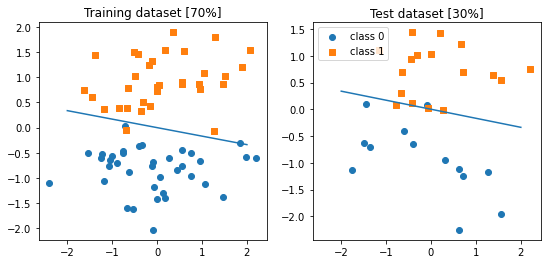

In [16]:
w, b = blob_perceptron.weights, blob_perceptron.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(9, 4))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[0].title.set_text('Training dataset [70%]')
ax[1].plot([x_min, x_max], [y_min, y_max])
ax[1].title.set_text('Test dataset [30%]')

ax[0].scatter(x_train_norm[y_train==0, 0], x_train_norm[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(x_train_norm[y_train==1, 0], x_train_norm[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(x_test_norm[y_test==0, 0], x_test_norm[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(x_test_norm[y_test==1, 0], x_test_norm[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()

After completion of the task, you must be able to answer the following questions:

-> Address and discuss the various complications (if any) that you have encountered in the preparation. What was the easy part?

Working with torch objects and functions for the first time was little challenging. Initial tasks and plots were easier to accomplish.

-> How many of the examples are correctly classified?

3 examples are incorrectly classified and 4 of them were intersecting on the line.


# Task – 3: Working with Mnist dataset 
Mnist dataset ( http://yann.lecun.com/exdb/mnist/ ) is a database of handwritten digits that comprise a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size normalized and centred in a fixed-size image. The original black and white (bi-level) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. The images were centred in a 28x28 image by computing the centre of mass of the pixels and translating the image to position this point at the centre of the 28x28 field.

Your task:
1. Import torch and torchvision
2. Create a data loader to load the MNIST training dataset using torch.utils.data. DataLoader()
3. Create a data loader to load the MNIST test dataset using torch.utils.data. DataLoader()
4. Plot samples of the training images
5. Use the given classes to create a NN
6. Use torch.optim to define the SGD optimizer
7. Train the network using the following data and the train function

n_epochs = 3

batch_size_train = 64

batch_size_test = 1000

learning_rate = 0.01

momentum = 0.5

log_interval = 10

8. Test the network using the test function
9. Evaluate the network by calculating the loss function and plot it

In [17]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

In [18]:
#write your codes and discuss here...
train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files/', train=True, download=True,
                transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                torchvision.transforms.Normalize((0.1307,), (0.3081,))])),batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files/', train=False, download=True, 
                transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize((0.1307,), (0.3081,))])),batch_size=batch_size_test, shuffle=True)

In [19]:
train_sample = enumerate(train_loader)
batch_idx, (sample_data, sample_targets) = next(train_sample)
sample_data.shape

torch.Size([64, 1, 28, 28])

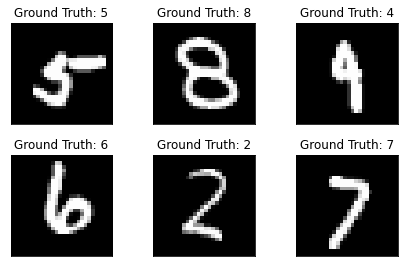

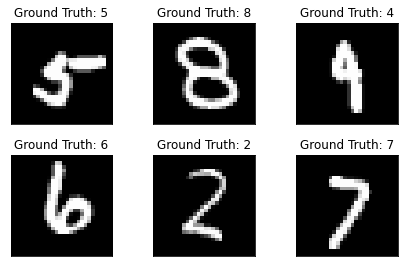

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(sample_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(sample_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [21]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [23]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [24]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [25]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

C:\Users\Krishna Bharat\AppData\Local\Temp\ipykernel_18336\161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
C:\Anaconda\envs\MLLAB\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3173, Accuracy: 786/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300301
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.328509
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.247835
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.308002
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.212432
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.079911
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.065053
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.888429
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.887120
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.593079
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.538828
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.322042
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.559945
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.255587
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.293167
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.207158
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.088193
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.058764
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.102840
Train Epoch: 1 [12160/6

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.284113
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.387324
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.245220
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.292081
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.364411
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.359899
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.331814
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.255614
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.319119
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.424187
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.373831
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.354385
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.165185
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.249323
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.253117
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.327183
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.310057
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.368691
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.297484
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.344158


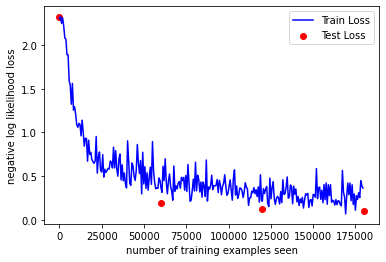

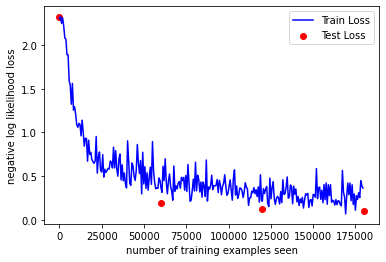

In [26]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [27]:
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

network_state_dict = torch.load('model.pth')
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

In [28]:
for i in range(4,9):
  test_counter.append(i*len(train_loader.dataset))
  train(i)
  test()

C:\Users\Krishna Bharat\AppData\Local\Temp\ipykernel_18336\161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 4 [0/60000 (0%)]	Loss: 0.147624
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.349844
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.269231
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.341611
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.146639
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.360117
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.216186
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.302253
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.190132
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.157641
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.169558
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.224634
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.296864
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.374667
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.264860
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.380470
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.136585
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.267054
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.284069
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.218291
Train Epoch: 4 [12800/60000 (

Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.113245
Train Epoch: 5 [45440/60000 (76%)]	Loss: 0.206628
Train Epoch: 5 [46080/60000 (77%)]	Loss: 0.052227
Train Epoch: 5 [46720/60000 (78%)]	Loss: 0.391908
Train Epoch: 5 [47360/60000 (79%)]	Loss: 0.177140
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.142337
Train Epoch: 5 [48640/60000 (81%)]	Loss: 0.211438
Train Epoch: 5 [49280/60000 (82%)]	Loss: 0.204869
Train Epoch: 5 [49920/60000 (83%)]	Loss: 0.147605
Train Epoch: 5 [50560/60000 (84%)]	Loss: 0.278021
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.284223
Train Epoch: 5 [51840/60000 (86%)]	Loss: 0.198196
Train Epoch: 5 [52480/60000 (87%)]	Loss: 0.259224
Train Epoch: 5 [53120/60000 (88%)]	Loss: 0.672087
Train Epoch: 5 [53760/60000 (90%)]	Loss: 0.232906
Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.235208
Train Epoch: 5 [55040/60000 (92%)]	Loss: 0.198807
Train Epoch: 5 [55680/60000 (93%)]	Loss: 0.063309
Train Epoch: 5 [56320/60000 (94%)]	Loss: 0.255609
Train Epoch: 5 [56960/60000 (95%)]	Loss: 0.151206


Train Epoch: 7 [28800/60000 (48%)]	Loss: 0.129154
Train Epoch: 7 [29440/60000 (49%)]	Loss: 0.177873
Train Epoch: 7 [30080/60000 (50%)]	Loss: 0.277035
Train Epoch: 7 [30720/60000 (51%)]	Loss: 0.197854
Train Epoch: 7 [31360/60000 (52%)]	Loss: 0.205338
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.031717
Train Epoch: 7 [32640/60000 (54%)]	Loss: 0.284216
Train Epoch: 7 [33280/60000 (55%)]	Loss: 0.098243
Train Epoch: 7 [33920/60000 (57%)]	Loss: 0.344935
Train Epoch: 7 [34560/60000 (58%)]	Loss: 0.226066
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.264990
Train Epoch: 7 [35840/60000 (60%)]	Loss: 0.341177
Train Epoch: 7 [36480/60000 (61%)]	Loss: 0.074311
Train Epoch: 7 [37120/60000 (62%)]	Loss: 0.253887
Train Epoch: 7 [37760/60000 (63%)]	Loss: 0.165921
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.166697
Train Epoch: 7 [39040/60000 (65%)]	Loss: 0.172238
Train Epoch: 7 [39680/60000 (66%)]	Loss: 0.350079
Train Epoch: 7 [40320/60000 (67%)]	Loss: 0.243781
Train Epoch: 7 [40960/60000 (68%)]	Loss: 0.105042


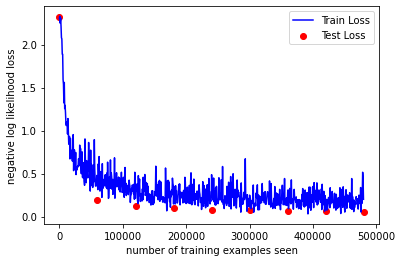

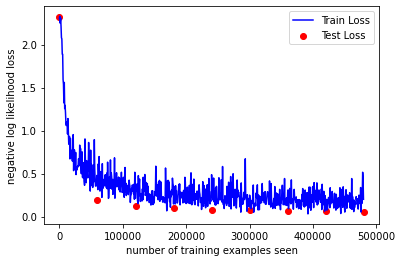

In [29]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

After completion of the task, you must be able to answer the following questions:

-> Address and discuss the various complications (if any) that you have encountered in the preparation. What was the easy part?

Working with torch objects and functions for the first time was little challenging. Initial tasks and plots were easier to accomplish.

-> How many of the examples are correctly classified?

For 3 epochs 9699 patters were identified correctly, but by running for 8 epochs 9826 patterns were classified correctly.


-> Do you get different classification results by tuning the parameters? Discuss the influence of parameters on the classification rate.